# Table of Contents
<a id="toc"></a>
- [1. Data Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Explore the Data](#3)
    - [3.1 Information about Data](#3.1)
    - [3.2 Visualization](#3.2)
- [4. Assign Features and target Variable](#4)
- [5. Spliting the data into Training and Testing Data](#5)
- [6. SVM Model](#6)
    - [6.1 Cross Validation](#6.1)
    - [6.2 Accuarcy of the model](#6.2)
    - [6.3 Confusion Matrix](#6.3)
    - [6.4 ROC Curve](#6.5)
- [7. ANN](#8)
    - [7.1 Build and Train NN](#7.1)
    - [7.2 Accuracy of the NN](#7.2)
    - [7.3 Loss Curve](#7.3)
    - [7.4 Confusion Matrix](#7.4)

<a id="1"></a>
# Data Description

***The data contains 5 Bayern Munich players and each player has about 100 random images collected from Google <br>
so our data have 5 classes:***
 - Kingsley Coman
 - Joshua Kimmich
 - Robert Lewandowski
 - Manuel Neuer
 - Leory Sane<br><br>

***Kingsley Coman Class 0***
<img src = 'kingsley_coman.png' width=800, hight=800>
***Joshua Kimmich Class 1***
<img src = 'Joshua Kimmich.jpg' width=400, hight=400>
***Robert Lewandowski Class 2***
<img src = 'Robert-Lewandowski.png' width=400, hight=400>
***Manuel Neuer Class 3***
<img src = 'Manuel Neuer.jpg' width=400, hight=400>
***Leory Sane Class 4***
<img src = 'FC Bayern Munich.png' width=800, hight=800>

<a d='2'></a>
# Import Necssaries Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from math import sqrt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

<a id='3'></a>
# Explore the Data

In [2]:
df = pd.read_csv("Bayern.csv") # read the data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Target
0,-0.546423,-0.469034,-0.428041,-0.517843,-0.435312,-0.348801,-0.850974,-0.840747,-0.771325,-0.871919,...,-1.567344,-1.331507,-1.362581,-1.257846,0.200789,0.265214,1.329462,0.883151,0.512070,2
1,0.325346,0.279344,0.084231,0.399309,0.380096,0.206045,0.489867,0.451229,0.328466,0.416079,...,0.876615,-1.331507,-0.055136,-1.178855,-0.962345,1.009106,-0.909622,-0.524674,-0.613211,3
2,0.293645,0.550034,0.596503,0.219475,0.466842,0.597702,0.004055,0.340488,0.379226,0.029680,...,0.692551,0.844015,0.849262,1.171127,1.303238,1.351688,-1.020568,-0.881732,-0.921916,1
3,1.197114,1.059568,0.549933,1.532262,1.316948,0.711935,1.752978,1.466353,0.785303,2.133410,...,0.723229,0.755419,0.770619,-0.981377,-0.840974,-0.860413,-0.687731,-0.932740,-0.921916,3
4,0.087590,0.215652,-0.024432,0.255442,0.362747,0.075493,0.353840,0.432772,0.108508,0.394613,...,-0.841314,-1.105095,-1.362581,1.171127,1.080725,1.351688,-0.899536,-0.667497,1.487977,2


<a id='3.1'></a>
**Information about data**

In [3]:
print(f"The data contains {len(df)} images")
print(f"Each image is {int(sqrt(df.shape[1] - 1))} * {int(sqrt(df.shape[1]-1))} Pixels")
print(f"Data contains {len(df.Target.unique())} Classes")

The data contains 230 images
Each image is 64 * 64 Pixels
Data contains 5 Classes


In [4]:
df.Target.value_counts()

3    59
1    52
2    45
4    43
0    31
Name: Target, dtype: int64

<a id='3.2'></a>
**Visualization**

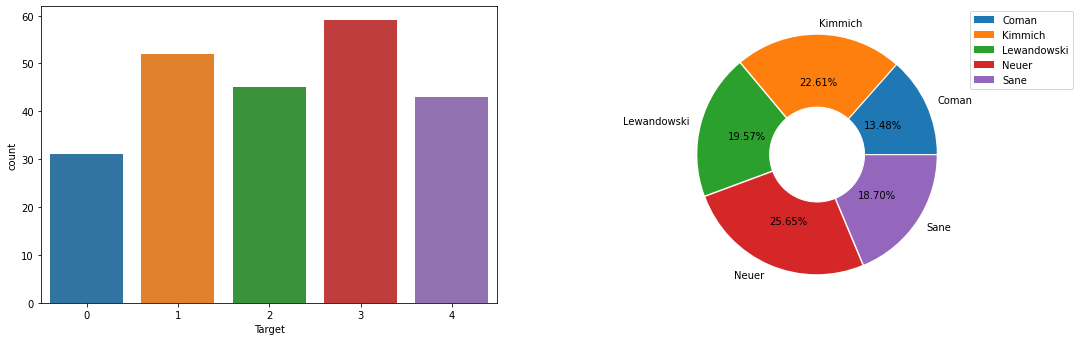

In [5]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.countplot(x='Target', data=df);

plt.subplot(2,2,2)
coman = df.Target[df.Target == 0].count()
kimmich = df.Target[df.Target == 1].count()
lewa = df.Target[df.Target == 2].count()
neuer = df.Target[df.Target == 3].count()
sane = df.Target[df.Target == 4].count()
weights = [coman, kimmich, lewa, neuer, sane]
labels = ['Coman', 'Kimmich', 'Lewandowski', 'Neuer', 'Sane']
plt.pie(weights, labels=labels, autopct='%.2f%%', explode=[0.01,0.01,0.01,0.01,0.01])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

<a id='4'></a>
# Assign Feature and Target Variable

In [6]:
X = df.drop("Target", axis=1)
y = df.Target

In [7]:
X.shape

(230, 4096)

In [8]:
y.shape

(230,)

<a id='5'></a>
# Splitting the data into Training and Testing Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=150)

In [24]:
print(f"Number of Training data: {len(X_train)}")
print(f"Number of Testing data: {len(X_test)}")

Number of Training data: 172
Number of Testing data: 58


In [25]:
X_train.shape

(172, 4096)

In [26]:
y_train.shape

(172,)

<a id='6'></a>
# SVM Model

<a id='6.1'></a>
**Cross Validation**

In [27]:
svm_model = SVC(kernel='linear', gamma='auto')
scores = cross_val_score(svm_model,X,y, cv=10)
np.average(scores)

0.8434782608695652

In [28]:
svm_model.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

<a id='6.2'></a>
**Score of the model**

In [29]:
svm_model.score(X_test, y_test)

0.896551724137931

<a id='6.3'></a>
**Confusion Matrix**

In [30]:
cm = confusion_matrix(y_test, svm_model.predict(X_test))
cm

array([[ 4,  1,  0,  0,  0],
       [ 0, 13,  1,  0,  1],
       [ 0,  0, 12,  0,  1],
       [ 0,  1,  0, 14,  0],
       [ 0,  1,  0,  0,  9]], dtype=int64)

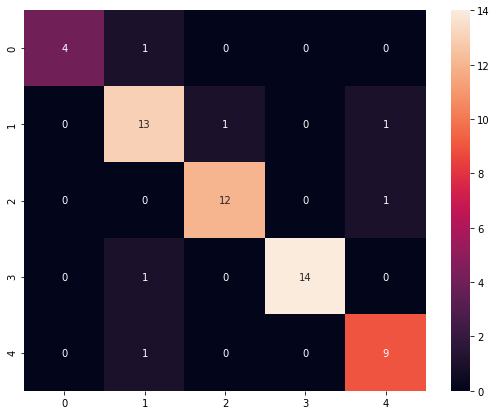

In [31]:
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True);

In [32]:
y_binarize = label_binarize(y, classes=[0,1,2,3,4])
y_binarize.shape

(230, 5)

In [33]:
binarize_df = pd.DataFrame(y_binarize)
binarize_df.head()

,0,1,2,3,4
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0


In [34]:
y_binarize.shape

(230, 5)

In [35]:
n_classes = y_binarize.shape[1]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y_binarize, test_size=0.25, random_state=150)

In [37]:
classifier = OneVsRestClassifier(
    SVC(kernel='linear', gamma='auto')
)

In [38]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
y_score

array([[-1.60718728, -0.53090481,  0.45276391, -1.06483396, -1.54857426],
       [-1.45358902, -0.15197821,  0.45329613, -1.30316109, -1.75755374],
       [-0.96029124, -0.48775536, -0.55695755, -0.70340374, -1.03364717],
       [-1.12629182,  0.89286103, -1.22104886, -1.46364358, -1.12694796],
       [ 0.29978422, -1.54328804, -1.14093989, -0.83258053, -0.71658257],
       [-1.37584739, -0.83757238, -1.05435026, -1.51100426,  0.89661788],
       [ 0.09915965, -0.55963698, -1.75003327, -0.8779454 , -0.65074421],
       [-0.64237263, -0.58172674, -1.40021309, -1.3171007 , -0.49273075],
       [-0.8366869 , -1.15729182, -1.52930615,  0.5153049 , -0.97559869],
       [-2.65785193, -0.15551489, -0.12722061, -1.0855031 , -0.46024263],
       [-2.23995423, -0.21418857, -0.84856656,  1.27353092, -2.24445902],
       [-2.12524358, -0.56071553, -0.89237212,  0.91868392, -1.46806529],
       [-0.7969668 , -1.27062128, -0.48643173, -1.83239938, -0.18644436],
       [-1.02599581, -0.49727724, -1.4

In [39]:
y_score.shape

(58, 5)

In [40]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [41]:
tpr

{0: array([0. , 0.2, 0.6, 0.6, 0.8, 0.8, 1. , 1. ]),
 1: array([0.        , 0.06666667, 0.6       , 0.6       , 0.73333333,
        0.73333333, 0.8       , 0.8       , 0.86666667, 0.86666667,
        0.93333333, 0.93333333, 1.        , 1.        ]),
 2: array([0.        , 0.07692308, 0.76923077, 0.76923077, 0.84615385,
        0.84615385, 0.92307692, 0.92307692, 1.        , 1.        ]),
 3: array([0.        , 0.06666667, 0.8       , 0.8       , 0.86666667,
        0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ]),
 4: array([0. , 0.1, 0.8, 0.8, 0.9, 0.9, 1. , 1. ])}

In [42]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [43]:
fpr["micro"]

array([0.        , 0.        , 0.        , 0.00862069, 0.00862069,
       0.02155172, 0.02155172, 0.02586207, 0.02586207, 0.03017241,
       0.03017241, 0.04310345, 0.04310345, 0.05172414, 0.05172414,
       0.10775862, 0.10775862, 0.18103448, 0.18103448, 0.22413793,
       0.22413793, 0.38793103, 0.38793103, 0.68534483, 0.68534483,
       1.        ])

In [44]:
tpr["micro"]

array([0.        , 0.01724138, 0.67241379, 0.67241379, 0.70689655,
       0.70689655, 0.75862069, 0.75862069, 0.81034483, 0.81034483,
       0.82758621, 0.82758621, 0.87931034, 0.87931034, 0.89655172,
       0.89655172, 0.93103448, 0.93103448, 0.94827586, 0.94827586,
       0.96551724, 0.96551724, 0.98275862, 0.98275862, 1.        ,
       1.        ])

In [45]:
roc_auc["micro"]

0.9644024970273484

<a id='6.5'></a>
**ROC Curve**

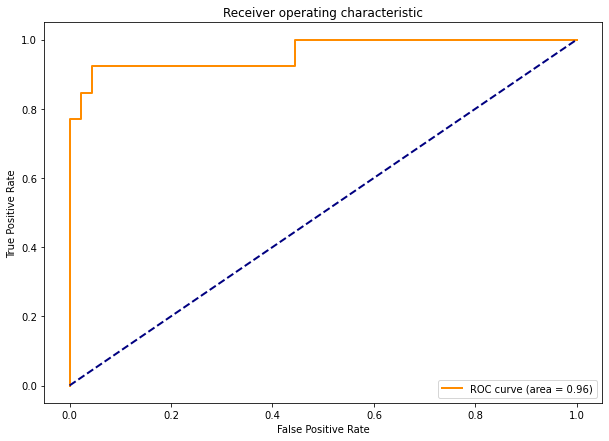

In [46]:
plt.figure(figsize=(10,7))
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

<a id="7"></a>
# ANN

In [47]:
FEATURES = [col for col in df.columns if col not in ['Target']]

In [48]:
X_nn = df[FEATURES].to_numpy()
y_nn = df['Target'].to_numpy()

In [49]:
X_nn.shape

(230, 4096)

In [50]:
y_nn.shape

(230,)

In [51]:
X_nn[0].shape

(4096,)

In [52]:
y_nn

array([2, 3, 1, 3, 2, 3, 2, 2, 1, 4, 4, 3, 4, 1, 3, 4, 1, 4, 3, 4, 4, 0,
       2, 2, 1, 4, 2, 2, 0, 3, 2, 2, 2, 4, 2, 2, 2, 0, 1, 3, 0, 0, 4, 1,
       1, 3, 0, 3, 2, 3, 1, 0, 4, 1, 3, 3, 1, 4, 3, 3, 1, 4, 0, 2, 2, 2,
       3, 4, 3, 2, 2, 3, 1, 4, 2, 0, 2, 1, 1, 3, 1, 1, 4, 4, 0, 3, 1, 0,
       1, 4, 1, 3, 1, 0, 0, 0, 4, 1, 0, 0, 2, 3, 3, 3, 4, 4, 1, 1, 3, 3,
       1, 3, 4, 0, 2, 3, 2, 3, 3, 1, 1, 3, 2, 3, 3, 1, 3, 4, 1, 4, 3, 4,
       4, 1, 3, 3, 3, 3, 2, 1, 4, 1, 3, 4, 1, 3, 0, 0, 1, 3, 1, 2, 4, 1,
       1, 4, 3, 4, 1, 0, 2, 4, 0, 3, 0, 3, 2, 2, 1, 0, 0, 1, 3, 1, 4, 3,
       4, 2, 1, 1, 1, 0, 2, 3, 4, 2, 3, 0, 3, 0, 4, 2, 3, 4, 1, 0, 0, 2,
       2, 4, 1, 4, 1, 3, 3, 3, 1, 0, 4, 1, 2, 2, 2, 3, 1, 3, 3, 2, 2, 3,
       1, 1, 2, 2, 4, 0, 4, 4, 3, 2], dtype=int64)

In [53]:
LE = LabelEncoder()
y_nn_cat = to_categorical(LE.fit_transform(y_nn))

In [54]:
y_nn_cat.shape

(230, 5)

In [55]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn,y_nn_cat, test_size=0.25, random_state=100)

<a id="7.1"></a>
**Build and Train NN**

In [60]:
def load_model(): 
    model = Sequential([
        Dense(4096, activation ='relu', input_shape = [X.shape[1]]),
        Dense(2048, activation ='relu'),
        Dense(1024, activation ='relu'),
        Dense(512, activation ='relu'),
        Dense(5, activation='softmax'),
    ])
    model.compile(
        optimizer=  tf.keras.optimizers.Adam(learning_rate = 0.0001),
        loss='categorical_crossentropy',
        metrics=['acc'],
    )
    return model
    
nn_model = load_model()
history = nn_model.fit(  X_train_nn , y_train_nn,
                validation_data = (X_test_nn , y_test_nn),
                epochs = 8,
                batch_size = 10,
              )

Epoch 1/8
18/18 [==============================] - 4s 167ms/step - loss: 1.2414 - acc: 0.4884 - val_loss: 0.9505 - val_acc: 0.6034
Epoch 2/8
18/18 [==============================] - 3s 148ms/step - loss: 0.1372 - acc: 0.9709 - val_loss: 0.6025 - val_acc: 0.7241
Epoch 3/8
18/18 [==============================] - 3s 148ms/step - loss: 0.0240 - acc: 1.0000 - val_loss: 0.6345 - val_acc: 0.8276
Epoch 4/8
18/18 [==============================] - 3s 149ms/step - loss: 0.0085 - acc: 1.0000 - val_loss: 0.6010 - val_acc: 0.8448
Epoch 5/8
18/18 [==============================] - 3s 152ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.5470 - val_acc: 0.8621
Epoch 6/8
18/18 [==============================] - 3s 153ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.5557 - val_acc: 0.8621
Epoch 7/8
18/18 [==============================] - 3s 151ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.5645 - val_acc: 0.8793
Epoch 8/8
18/18 [==============================] - 3s 150ms/step - loss: 9.8589e-04

<a id="7.2"></a>
**Accuracy of ANN**

In [62]:
nn_model.evaluate(X_test_nn, y_test_nn)

2/2 [==============================] - 0s 55ms/step - loss: 0.5565 - acc: 0.8793


[0.5564684271812439, 0.8793103694915771]

<a id='7.3'></a>
**Loss Curve**

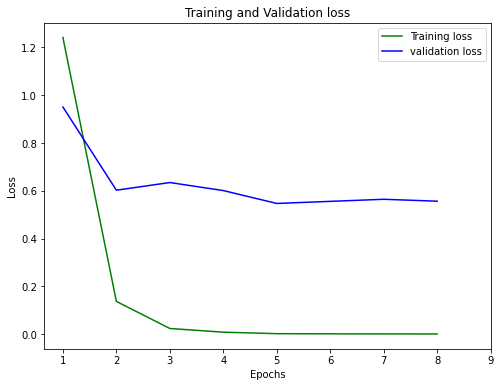

In [64]:
plt.figure(figsize=(8,6))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,9)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(1,10))
plt.legend()
plt.show()

In [65]:
y_predicted = nn_model.predict(X_test_nn)

In [66]:
y_predicted

array([[9.64173436e-01, 1.73854751e-05, 3.37773054e-05, 1.70756437e-04,
        3.56045552e-02],
       [8.15547755e-05, 8.61108482e-01, 8.09811801e-02, 1.51307127e-02,
        4.26980630e-02],
       [2.51496341e-02, 2.06680726e-02, 5.16358437e-03, 6.97127163e-01,
        2.51891583e-01],
       [2.98139112e-05, 9.80977774e-01, 4.86336387e-04, 1.74615793e-02,
        1.04439131e-03],
       [1.44344041e-04, 7.97470158e-04, 9.96545494e-01, 8.44929134e-04,
        1.66774529e-03],
       [1.31185295e-03, 8.09621662e-02, 3.89274349e-03, 9.08251703e-01,
        5.58154285e-03],
       [1.10423731e-04, 1.23891346e-02, 1.54961389e-03, 9.84227479e-01,
        1.72332022e-03],
       [9.68839884e-01, 2.67171505e-04, 2.24526229e-05, 1.04134015e-04,
        3.07663921e-02],
       [1.11350371e-02, 5.45673370e-01, 7.15861246e-02, 1.77564994e-01,
        1.94040537e-01],
       [1.20193974e-04, 4.27131192e-04, 3.84727085e-04, 2.17664128e-04,
        9.98850226e-01],
       [2.02252631e-05, 4.8967

In [67]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [68]:
y_predicted_labels

[0,
 1,
 3,
 1,
 2,
 3,
 3,
 0,
 1,
 4,
 3,
 2,
 3,
 0,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 1,
 1,
 0,
 3,
 4,
 1,
 1,
 4,
 2,
 4,
 1,
 3,
 0,
 3,
 3,
 0,
 0,
 1,
 4,
 4,
 3,
 2,
 2,
 4,
 4,
 2,
 3,
 4,
 4,
 0,
 2,
 1,
 2]

In [69]:
y_predicted_labels = np.array(y_predicted_labels)
y_predicted_labels.shape

(58,)

In [70]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn,y_nn, test_size=0.25, random_state=100)

In [71]:
y_test_nn.shape

(58,)

In [72]:
cm = tf.math.confusion_matrix(labels=y_test_nn, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 7,  0,  0,  0,  0],
       [ 0,  8,  0,  3,  0],
       [ 0,  0, 13,  0,  0],
       [ 0,  2,  0, 13,  0],
       [ 1,  0,  1,  0, 10]])>

<a id='7.4'></a>
**Confusion Matrix**

<AxesSubplot:>

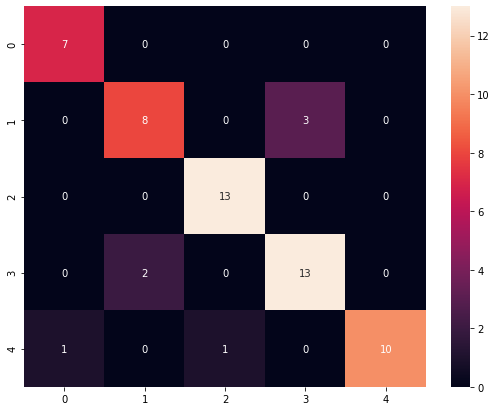

In [73]:
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True)